# Downloading data

In [72]:
%env ECCODES_DEFINITION_PATH=C:/Users/hsven/Miniconda3/envs/timeseries/Library/share/eccodes/definitions
import cdsapi
import xarray as xr
import utils
import pandas as pd
c = cdsapi.Client()

env: ECCODES_DEFINITION_PATH=C:/Users/hsven/Miniconda3/envs/timeseries/Library/share/eccodes/definitions


## Solar radiation data

Radiation quantities: https://www.ecmwf.int/sites/default/files/elibrary/2015/18490-radiation-quantities-ecmwf-model-and-mars.pdf

To convert an instantaneous pyrheliometer flux to the flux into a flat horizontal plane, multiply it by cos(θ0), where θ0 is the solar zenith angle

* ssrd - Surface solar radiation downwards - the amount of solar radiation (also known as shortwave radiation) that reaches a horizontal plane at the surface of the Earth. This parameter comprises both direct and diffuse solar radiation.(https://apps.ecmwf.int/codes/grib/param-db/?id=169)
* fdir - Total sky direct solar radiation at surface -  the amount of direct solar radiation (also known as shortwave radiation) reaching the surface of the Earth. It is the amount of radiation passing through a horizontal plane, not a plane perpendicular to the direction of the Sun.
* diffuse radiation = ssrd - fdir

Other:
* dsrp - direct solar radiation (perpendicular to sun) https://apps.ecmwf.int/codes/grib/param-db/?id=47
* vddsf - Visible Diffuse Downward Solar Flux (https://apps.ecmwf.int/codes/grib/param-db/?id=260347)
* vbdsf - Visible Beam Downward Solar Flux (W/m2) (https://apps.ecmwf.int/codes/grib/param-db/?id=260346)

In [2]:
# Download data
# temperature at pressure level 1000 hPa
data1 = {
    "product_type": "reanalysis",
    "variable": "temperature",
    "pressure_level": "1000",
    "year": "2008",
    "month": "01",
    "day": "01",
    "time": "12:00",
    "area": [70, -5, 50, 15], # North, West, South, East. Default: global
#    "grid": [1.0, 1.0], # Latitude/longitude grid: east-west (longitude) and north-south resolution (latitude). Default: 0.25 x 0.25    
    "format": "grib" # may be netcdf
}
data_ssrd = {
    "product_type": "reanalysis",
    "variable": 'surface_solar_radiation_downwards',
    "pressure_level": "1000",
    "year": "2008",
    "month": "03",
    "day": "01",
    'time' : ['{:02d}:00'.format(x) for x in range(24)],
    'area': [70, -10, 50,20,],
    "format": "netcdf" # may be netcdf
}
data_surface = {
        'format': 'netcdf',
#        'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind',
#                     '2m_temperature','surface_solar_radiation_downwards',],
        'variable': 'surface_solar_radiation_downwards',
        'year': '2018',
        'month': '03',
        'day': '01',
        'time' : ['{:02d}:00'.format(x) for x in range(24)],
        'area': [70, -10, 50,20,],
    }
data_singlelevel = {
        'format': 'netcdf',
        'product_type': 'reanalysis',
        'variable': ['ssrd','fdir'],
        'year': '2018',
        'month': '03',
        'time' : ['{:02d}:00'.format(x) for x in range(24)],
        'area': [70, -10, 50,20,],
    } 
data_test = {
        'variable': '2m_temperature',
        'product_type': 'reanalysis',
        'year': '2017',
        'month': '01',
        'day': ['01', '02'],
        'time': ['00:00', '12:00'],
        'area': ['35.5', '6.5', '47.', '19.'],
        'format': 'grib',
        },

#c.retrieve("reanalysis-era5-pressure-levels",data1,"test.grb")
#c.retrieve('reanalysis-era5-pressure-levels',data_ssrd,"pressure.nc")
#c.retrieve('reanalysis-era5-land',data_surface,"surface.nc")
#c.retrieve('reanalysis-era5-single-levels',data_test,"surface_singlelevel.grb")
c.retrieve('reanalysis-era5-single-levels',data_singlelevel,"surface_singlelevel.nc")


2022-02-28 09:45:08,981 INFO Welcome to the CDS
2022-02-28 09:45:08,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-02-28 09:45:09,195 INFO Request is queued
2022-02-28 09:45:10,250 INFO Request is failed
2022-02-28 09:45:10,250 ERROR Message: no data is available within your requested subset
2022-02-28 09:45:10,251 ERROR Reason:  Request returned no data
2022-02-28 09:45:10,252 ERROR   Traceback (most recent call last):
2022-02-28 09:45:10,252 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 59, in handle_request
2022-02-28 09:45:10,253 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2022-02-28 09:45:10,254 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2022-02-28 09:45:10,255 ERROR       result = proc(context, *context.args, **context.kwargs)
2022-02-28 09:45:10,256 ERROR     File "/opt/cdstoolbo

Exception: no data is available within your requested subset. Request returned no data.

## Wind speed data - GRIB

In [116]:
# Download for single time to get coordate system
params={
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': ['100m_u_component_of_wind'],
        'year': 2020,
        'month': 2,
        'day': [x+1 for x in range(31)],  # days 1-31
        'time': [f"{x:02d}:00" for x in range(24)],  # hours 00-23
        'area': [70, -10, 35, 30],
    }
c.retrieve('reanalysis-era5-single-levels',params,'wind_2020-02.grib')

2022-03-04 11:31:23,818 INFO Welcome to the CDS
2022-03-04 11:31:23,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-03-04 11:31:23,879 INFO Request is queued
2022-03-04 11:59:44,391 INFO Request is running
2022-03-04 12:01:44,585 INFO Request is completed
2022-03-04 12:01:44,696 INFO Downloading https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.internal-1646391542.0701997-4815-11-eb1693b9-ccb7-4126-badd-8ec2fac5cf40.grib to wind_2020-02.grib (30.3M)
2022-03-04 12:01:57,728 INFO Download rate 2.3M/s                                                                      


Result(content_length=31737600,content_type=application/x-grib,location=https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.internal-1646391542.0701997-4815-11-eb1693b9-ccb7-4126-badd-8ec2fac5cf40.grib)

In [126]:
ds = xr.open_dataset("wind_2020-02.grib", engine="cfgrib")

In [127]:
ds

<xarray.Dataset>
Dimensions:     (time: 696, latitude: 141, longitude: 161)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:00:00
    step        timedelta64[ns] ...
    surface     int32 ...
  * latitude    (latitude) float64 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 -10.0 -9.75 -9.5 -9.25 ... 29.5 29.75 30.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    u100        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-04T12:06:54 GRIB to CDM+CF via cfgrib-0....

2022-03-04 12:14:09,928 WARNING DELETE https://cds.climate.copernicus.eu/api/v2/tasks/d00e3eb1-9553-4759-a562-0522b92d26f8 returns 404 


In [2]:
# Coordinates of interest:
my_lat = 62.1
my_lon = 10.87
# Find nearest points in dataset:
ds = xr.open_dataset("wind_single.grib", engine="cfgrib")
data_lat,data_lon = utils.find_nearest_datapoint(my_lat,my_lon,ds)

In [57]:
# Retrieve data from coord of interest
eps = 0.25 # big enough to include two points - to avoid dimension issue
time_range = ['{:02d}:00'.format(x) for x in range(24)]
area = [data_lat+eps, data_lon, data_lat, data_lon+eps]  #[north, west, south, east]
c.retrieve('reanalysis-era5-single-levels',{
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            '100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_wind',
            '10m_v_component_of_wind'],
        'date': '2020-01-01/2020-12-31',
        'time': [f"{x:02d}:00" for x in range(24)], # hours 00-23
        'area': area
    },
    f"wind_2020_{data_lat},{data_lon}.grib") 

2022-03-02 09:06:25,320 INFO Welcome to the CDS
2022-03-02 09:06:25,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-03-02 09:06:25,374 INFO Request is queued
2022-03-02 09:06:26,424 INFO Request is running
2022-03-02 09:22:44,712 INFO Request is completed
2022-03-02 09:22:44,714 INFO Downloading https://download-0009.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.internal-1646208385.664411-29145-10-a0984e8f-9b66-40da-834e-683428f4c8d4.grib to wind_2020_62.0,10.75.grib (4M)
2022-03-02 09:22:45,280 INFO Download rate 7.1M/s                                                                      


Result(content_length=4216320,content_type=application/x-grib,location=https://download-0009.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.internal-1646208385.664411-29145-10-a0984e8f-9b66-40da-834e-683428f4c8d4.grib)

In [58]:
grib_path=f"wind_2020_{data_lat},{data_lon}.grib"
ds1 = xr.open_dataset(grib_path, engine="cfgrib")
dataset_vars = list(ds1.keys())
dataset_coords=list(ds1.coords.keys())
#import cfgrib
#ds2 = cfgrib.open_datasets(grib_path, backend_kwargs={'indexpath': '',"decode_cf":False})

2022-03-02 09:22:45,294 WARNING Ignoring index file 'C:\\Users\\hsven\\code\\energy_timeseries\\era5\\wind_2020_62.0,10.75.grib.90c91.idx' older than GRIB file


In [87]:
ds1.coords

Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     int32 0
  * latitude    (latitude) float64 62.25 62.0
  * longitude   (longitude) float64 10.75 11.0
    valid_time  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00

In [96]:
df = pd.DataFrame()
for v in dataset_vars:
    df[v] = ds1[v].sel(latitude=62.25,longitude=10.75).to_pandas()
#df = pd.DataFrame(columns=dataset_vars,index=ds1["time"])


In [115]:
df

,u100,v100,u10,v10
time,,,,
2020-01-01 00:00:00,2.265427,3.596771,0.049683,2.501022
2020-01-01 01:00:00,2.312408,4.652557,-0.145203,2.184723
2020-01-01 02:00:00,2.213898,3.145508,-0.632614,2.271942
2020-01-01 03:00:00,3.631088,1.834656,0.204590,2.390533
2020-01-01 04:00:00,5.223022,1.577698,1.287994,2.245453
...,...,...,...,...
2020-12-31 19:00:00,-1.138229,-0.253586,-0.523788,-0.735809
2020-12-31 20:00:00,-0.916809,-0.389084,-0.166626,-0.819412
2020-12-31 21:00:00,-0.794617,-0.528046,-0.012100,-0.876495


<AxesSubplot:title={'center':'Wind shear'}, xlabel='u10', ylabel='u100'>

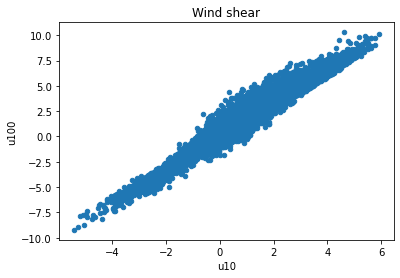

In [100]:
df.plot.scatter(x="u10",y="u100",title="Wind shear")

In [28]:
# Load just to memory (not file):
fl = c.retrieve('reanalysis-era5-single-levels',{
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            '100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_wind',
            '10m_v_component_of_wind'],
        'date': '2020-02-01/2020-02-07',
        'time': '00:00/23:00',
        'area': [70, -10, 50,20], #[north, west, south, east]
    }) 
fl.download("wind_test3.grib")

2022-02-28 15:17:14,194 INFO Welcome to the CDS
2022-02-28 15:17:14,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-02-28 15:17:14,331 INFO Downloading https://download-0007.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1646056926.198549-28791-18-0a9f2147-fa65-4daf-afb3-b7d85ad33b4f.grib to wind_test3.grib (464.1K)
2022-02-28 15:17:14,641 INFO Download rate 1.5M/s                                                                      


'wind_test3.grib'

In [17]:
fl

Result(content_length=475200,content_type=application/x-grib,location=https://download-0007.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1646056926.198549-28791-18-0a9f2147-fa65-4daf-afb3-b7d85ad33b4f.grib)

In [27]:
import urllib
import xarray as xr
with urllib.request.urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read(),engine="cfgrib")

2022-02-28 15:15:27,418 ERROR Can't create file 'b\'GRIB\\x00L\\xfe\\x01\\x00\\x004\\xe4b\\x91\\xff\\x80\\xf6\\x01\\x00\\x00\\x14\\x02\\x01\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x15\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x17\\x02\\x04\\x010001\\x00\\x00\\x00\\x00\\x00 \\x00\\xff\\x00\\x00y\\x00Q\\x01\\x11p\\x80\\\'\\x10\\x80\\x00\\xc3P\\x00N \\x00\\xfa\\x00\\xfa\\x00\\x00\\x00\\x00\\x00\\x00L\\x9e\\x08\\x80\\n\\xc2\\x12*\\x8f\\x10I\\xbcI\\xdaIqH\\xf3HmG:F\\x0cD\\xeaD\\xe4D\\xc9D\\xa5E\\x1dE\\x88E\\xcfD\\xd1C\\xf7C)A\\xcc@h>\\xf1=\\x98<_;2:\\xa7:\\x039\\x198 7a6\\xb75\\xda5\\x044@3\\x8f2\\xdd2*1m0\\xb40\\x04/6.O-^,n+\\x88*\\xc1*N)\\xdd)l)L)\\x1d(\\xc2(b(;(*\\\'\\xb3\\\'\\x13&\\x01$\\xbd#\\xc6"\\xec!\\xb7 \\x92\\x1f\\x9b\\x1e\\xdd\\x1e\\x00\\x1d\\x17\\x1c\\xa3\\x1c%\\x1b\\x8b\\x1b\\r\\x1a\\xbf\\x1a\\x82\\x1a\\x85\\x1as\\x1a!\\x19\\xf9\\x19\\xe2\\x19\\xd3\\x19\\xcd\\x19\\xdc\\x1a\\x1e\\x1a\\xb3\\x1a\\xfb\\x1b(\\x1b\\xc1\\x1c}\\x1d\\x97\\x1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfe in position 6: invalid start byte

In [ ]:
ds

In [5]:
# Download to NETCDF format:
c.retrieve('reanalysis-era5-single-levels',{
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_wind',
            '10m_v_component_of_wind'],
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': ['00:00', '01:00'],
        'area': [70, -30, 50,40],
    },
    'wind_test.nc')

2022-02-28 09:58:37,471 INFO Welcome to the CDS
2022-02-28 09:58:37,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-02-28 09:58:37,526 INFO Request is queued
2022-02-28 09:58:38,586 INFO Request is running
2022-02-28 09:58:40,142 INFO Request is completed
2022-02-28 09:58:40,144 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1646038718.9849703-26332-8-e4dc834b-edb7-498b-8364-924a2bd2a9c2.nc to wind_test.nc (358.9K)
2022-02-28 09:58:40,519 INFO Download rate 959.5K/s                                                                    


Result(content_length=367468,content_type=application/x-netcdf,location=https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1646038718.9849703-26332-8-e4dc834b-edb7-498b-8364-924a2bd2a9c2.nc)

## NetCDF format

In [3]:
# Download to NETCDF format:
data_wind_1 = {
        'format': 'netcdf',
        'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind'],
        'year': '2018',
        'month': '03',
        'day': '01',
        'time' : ['{:02d}:00'.format(x) for x in range(24)],
        'area': [70, -10, 50,20,],
    }
c.retrieve('reanalysis-era5-single-levels',data_wind_1,"surface_wind1.nc")

2022-02-28 09:48:37,753 INFO Welcome to the CDS
2022-02-28 09:48:37,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-02-28 09:48:37,812 INFO Request is queued
2022-02-28 09:48:38,872 INFO Request is running
2022-02-28 09:48:58,951 INFO Request is failed
2022-02-28 09:48:58,951 ERROR Message: the request you have submitted is not valid
2022-02-28 09:48:58,952 ERROR Reason:  ECCODES ERROR   :  GRIB message 179 has different resolution

ECCODES ERROR   :  lat=81, long=121 instead of lat=41, long=61

grib_to_netcdf: Version 2.24.2
grib_to_netcdf: Processing input file '/cache/tmp/2abe64a3-6122-4a28-a7a6-b078a96db7f0-adaptor.mars.internal-1646038118.9222157-9649-8-tmp.grib'.
grib_to_netcdf: Found 470 GRIB fields in 1 file.
grib_to_netcdf: Ignoring key(s): method, type, stream, refdate, hdate
grib_to_netcdf: Creating netCDF file '/cache/data4/adaptor.mars.internal-1646038132.8128445-9649-5-2abe64a3-6122-4a28-a7a6-b078a96db7f0.n

Exception: the request you have submitted is not valid. ECCODES ERROR   :  GRIB message 179 has different resolution

ECCODES ERROR   :  lat=81, long=121 instead of lat=41, long=61

grib_to_netcdf: Version 2.24.2
grib_to_netcdf: Processing input file '/cache/tmp/2abe64a3-6122-4a28-a7a6-b078a96db7f0-adaptor.mars.internal-1646038118.9222157-9649-8-tmp.grib'.
grib_to_netcdf: Found 470 GRIB fields in 1 file.
grib_to_netcdf: Ignoring key(s): method, type, stream, refdate, hdate
grib_to_netcdf: Creating netCDF file '/cache/data4/adaptor.mars.internal-1646038132.8128445-9649-5-2abe64a3-6122-4a28-a7a6-b078a96db7f0.nc'
grib_to_netcdf: NetCDF library version: 4.3.3.1 of Dec 10 2015 16:44:18 $
grib_to_netcdf: Creating large (64 bit) file format.
grib_to_netcdf: Defining variable 'u10'.
grib_to_netcdf: Defining variable 'v10'.
.